Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Mount Google Drive

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')

Mounted at /content/drive


Specify the path to the CSV file of the dataset on Google Drive

In [7]:
file_path = '/content/drive/MyDrive/Deep_Learning_Mini_Project_2/Cargills_PLC_DataSet/CARG-Historical-Data.csv'

Load Data

In [8]:
data = pd.read_csv(file_path)
prices = data['Price'].values.reshape(-1, 1)

Normalize data

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

Split data into training and testing sets

In [10]:
split_ratio = 0.8
split_index = int(len(prices_normalized) * split_ratio)
train_data = prices_normalized[:split_index]
test_data = prices_normalized[split_index:]

Prepare data for LSTM

In [11]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input data to be in the form [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Build LSTM model

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
7/7 [==============================] - 6s 19ms/step - loss: 0.2294
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0378
Epoch 3/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0211
Epoch 4/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0227
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0118
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0085
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0065
Epoch 8/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0051
Epoch 9/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0044
Epoch 10/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0040
Epoch 11/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0039
Epoch 12/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0038
Epoch 13/50
7/7 [==============================] - 0s 15ms/st

Predictions

2/2 [==============================] - 1s 9ms/step


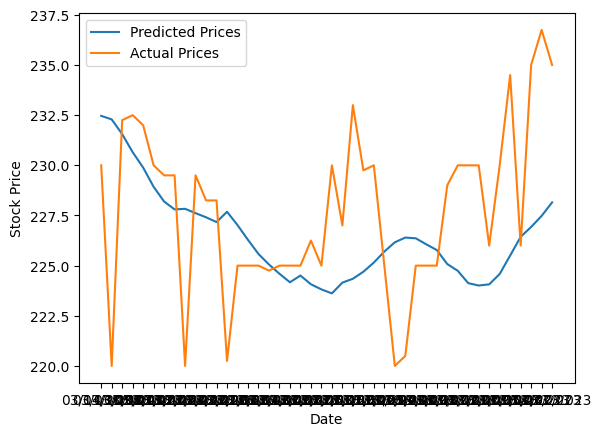

In [13]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Plot the results
plt.plot(data['Date'][split_index + time_steps:], predicted_stock_prices, label='Predicted Prices')
plt.plot(data['Date'][split_index + time_steps:], scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)),
         label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Comparison of the predicted prices with the actial prices

In [14]:
# Combine actual and predicted prices into a DataFrame for easier printing
results_df = pd.DataFrame({
    'Date': data['Date'][split_index + time_steps:],
    'Actual Prices': scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)).flatten(),
    'Predicted Prices': predicted_stock_prices.flatten()
})

# Print the DataFrame
print(results_df)

           Date  Actual Prices  Predicted Prices
222  03/14/2023         230.00        232.466492
223  03/13/2023         220.00        232.289444
224  03/10/2023         232.25        231.556625
225  03/09/2023         232.50        230.655701
226  03/08/2023         232.00        229.888016
227  03/07/2023         230.00        228.928284
228  03/03/2023         229.50        228.193954
229  03/02/2023         229.50        227.802216
230  03/01/2023         220.00        227.831879
231  02/28/2023         229.50        227.614899
232  02/24/2023         228.25        227.408707
233  02/23/2023         228.25        227.171844
234  02/22/2023         220.25        227.685959
235  02/21/2023         225.00        227.020065
236  02/20/2023         225.00        226.282562
237  02/16/2023         225.00        225.580566
238  02/15/2023         224.75        225.056305
239  02/14/2023         225.00        224.593872
240  02/13/2023         225.00        224.170151
241  02/10/2023     

Assess the performance of the model by computing the Root Mean Squared Error (RMSE)

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions on the test data
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Inverse transform the original test data for comparison
actual_stock_prices = scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1))

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_stock_prices, predicted_stock_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

2/2 [==============================] - 0s 9ms/step
Root Mean Squared Error (RMSE): 4.7240825171101966
